13. This question should be answered using the Weekly data set, which
is part of the ISLP package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [3]:
weekly = load_data('Weekly')
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [4]:
weekly.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


<Axes: >

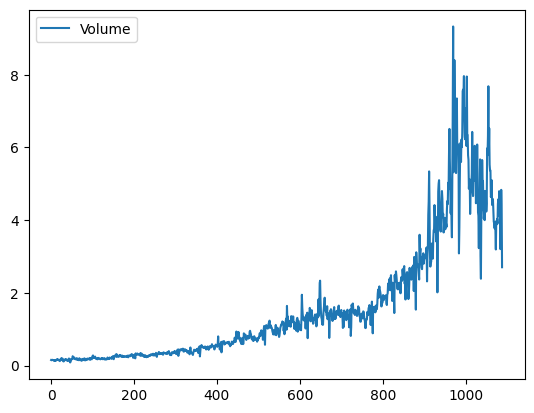

In [5]:
weekly.plot(y='Volume')

- Volume increases as year increases.

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [7]:
from sklearn.linear_model import LogisticRegression
from statsmodels.api import GLM

In [8]:
weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [13]:
allvars = weekly.columns.drop(['Year','Direction','Today'])
X = MS(allvars).fit_transform(weekly)
y = weekly.Direction == 'Up'
glm = sm.GLM(y,X,family=sm.families.Binomial())
results = glm.fit()
summarize(results)


,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


- Lag2 is significant.

(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression

In [17]:
from sklearn.metrics import confusion_matrix
from ISLP import confusion_table
probs = results.predict()
labels = np.array(['Down'] * X.shape[0])
labels[probs > 0.5] = 'Up'
confusion_table(labels,weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


- Model predicted up direction too much, therefore, even when market is down model predicted up. FN, type 2 error.

(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010)

In [79]:
X

,intercept,Lag2
0,1.0,1.572
1,1.0,0.816
2,1.0,-0.270
3,1.0,-2.576
4,1.0,3.514
...,...,...
1084,1.0,0.043
1085,1.0,-0.861
1086,1.0,2.969
1087,1.0,1.281


In [71]:
train = (weekly.Year <= 2008)
mod = MS(['Lag2']).fit(weekly)
X = mod.transform(weekly)
X_train = X.loc[train]
X_test = X.loc[~train]
y_train = weekly.loc[train].Direction == 'Up'
y_test = weekly.loc[~train].Direction == 'Up'
label_test = weekly.loc[~train].Direction
label_train = weekly.loc[train].Direction
glm_train = sm.GLM(y_train,X_train,family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels_test = np.array(['Down'] * X_test.shape[0])
labels_test[probs > 0.5] = 'Up'
confusion_table(labels_test,label_test)


Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [43]:
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2033,0.064,3.162,0.002
Lag2,0.0581,0.029,2.024,0.043


(e) Repeat (d) using LDA

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

lda = LDA(store_covariance=True)
X_train_noint, X_test_noint = X_train.drop(columns=['intercept']), X_test.drop(columns=['intercept'])
lda.fit(X_train.drop(columns=['intercept']),y_train)
lda_pred = lda.predict(X_test.drop(columns=['intercept']))
label_lda = np.array(['Down']*X_test.shape[0])
label_lda[lda_pred > 0.5] = 'Up'
confusion_table(label_lda,label_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


(f) Repeat (d) using QDA.

In [69]:
lda_pred

array([ True,  True, False, False,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [73]:
qda = QDA(store_covariance=True)
qda.fit(X_train_noint,label_train)
preds_qda = qda.predict(X_test_noint)
confusion_table(preds_qda,label_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


(g) Repeat (d) using KNN with K = 1.

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_noint,label_train)
preds_knn = knn.predict(X_test_noint)
confusion_table(preds_knn,label_test)

Truth,Down,Up
Predicted,,
Down,22,31
Up,21,30


(h) Repeat (d) using naive Bayes.

In [74]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_noint,label_train)
preds_nb = nb.predict(X_test_noint)
confusion_table(preds_nb,label_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


(i) Which of these methods appears to provide the best results on
this data?

- Highest sensitivity (TP/(TP+FN)) is from lda and logistic regression.


In [75]:
sensitivity_lda = 56 / (56+34)
sensitivity_logreg = 56 / (56+34)
sensitivity_qda = 61 / (61+43)
sensitivity_knn = 30 / (30+21)
sensitivity_nb = 61 / (61+43)
print([sensitivity_lda,sensitivity_logreg,sensitivity_qda,sensitivity_knn,sensitivity_nb])

[0.6222222222222222, 0.6222222222222222, 0.5865384615384616, 0.5882352941176471, 0.5865384615384616]


(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

- Lda seems to be working better in terms of sensitivity.

In [81]:
X_train_new, X_test_new = weekly[['Lag1','Lag2']][train], weekly[['Lag1','Lag2']][~train]
y_train_new, y_test_new = weekly['Direction'][train], weekly['Direction'][~train]


In [82]:
lda2 = LDA(store_covariance=True)
lda2.fit(X_train_new,y_train_new)
pred_lda2 = lda2.predict(X_test_new)
confusion_table(pred_lda2, label_test)

Truth,Down,Up
Predicted,,
Down,7,8
Up,36,53


In [83]:
qda2 = QDA(store_covariance=True)
qda2.fit(X_train_new,y_train_new)
pred_qda2 = qda2.predict(X_test_new)
confusion_table(pred_qda2, label_test)

Truth,Down,Up
Predicted,,
Down,7,10
Up,36,51


In [85]:
logreg = LogisticRegression()
logreg.fit(X_train_new,y_train_new)
pred_logreg = logreg.predict(X_test_new)
confusion_table(pred_logreg,label_test)

Truth,Down,Up
Predicted,,
Down,7,8
Up,36,53


In [88]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_new,y_train_new)
pred_knn1 = knn1.predict(X_test_new)
confusion_table(pred_knn1,label_test)

Truth,Down,Up
Predicted,,
Down,18,29
Up,25,32


In [89]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train_new,y_train_new)
pred_knn2 = knn2.predict(X_test_new)
confusion_table(pred_knn2,label_test)

Truth,Down,Up
Predicted,,
Down,33,47
Up,10,14


In [90]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_new,y_train_new)
pred_knn3 = knn3.predict(X_test_new)
confusion_table(pred_knn2,label_test)

Truth,Down,Up
Predicted,,
Down,33,47
Up,10,14


In [91]:
nb2 = GaussianNB()
nb2.fit(X_train_new,y_train_new)
pred_nb2 = nb2.predict(X_test_new)
confusion_table(pred_nb2,label_test)

Truth,Down,Up
Predicted,,
Down,3,8
Up,40,53


14. In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.
(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
method of the data frame. Note you may find it helpful to add
a column mpg01 to the data frame by assignment. Assuming you
have stored the data frame as Auto, this can be done as follows:

In [134]:
auto = load_data('Auto')
mpg01 = np.array([False]* auto.shape[0])
mpg01[auto.mpg > auto.mpg.median()] = True
auto['mpg01'] = mpg01

(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

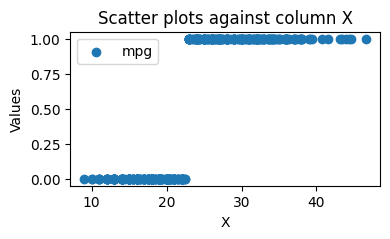

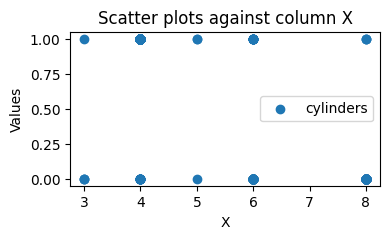

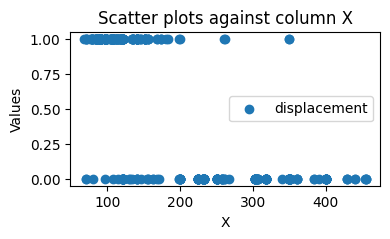

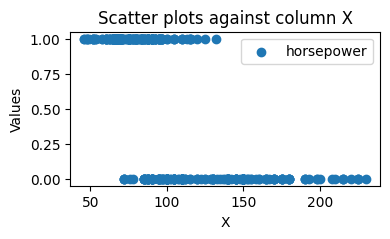

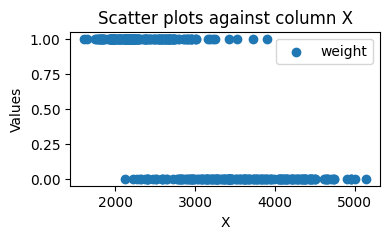

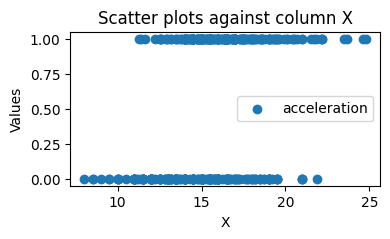

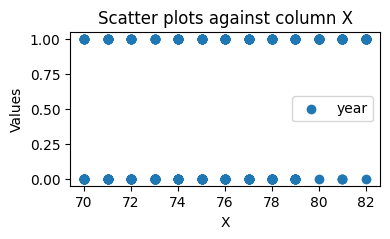

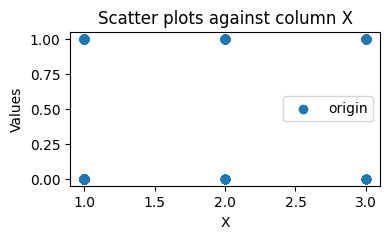

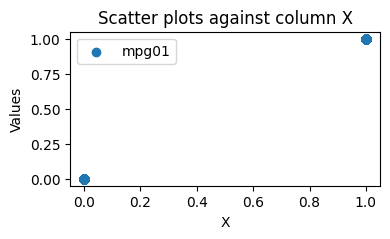

In [135]:
import matplotlib.pyplot as plt


for column in auto.columns:
    plt.figure(figsize=(4,2))
    plt.scatter(auto[column],auto['mpg01'],label=column)
    plt.xlabel('X')
    plt.ylabel('Values')
    plt.legend()
    plt.title('Scatter plots against column X')
    plt.show()


<Figure size 640x480 with 0 Axes>

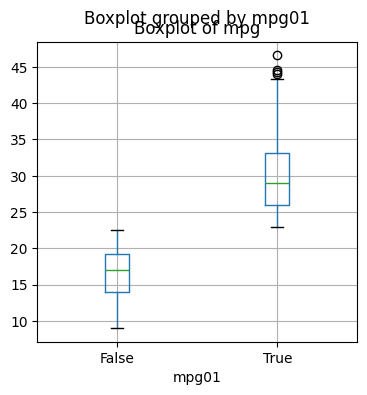

<Figure size 640x480 with 0 Axes>

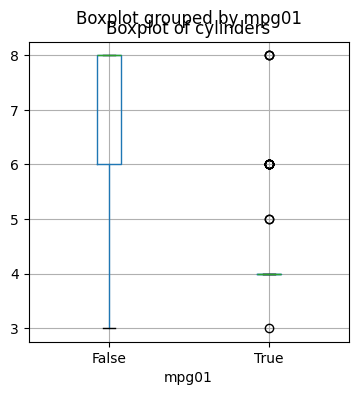

<Figure size 640x480 with 0 Axes>

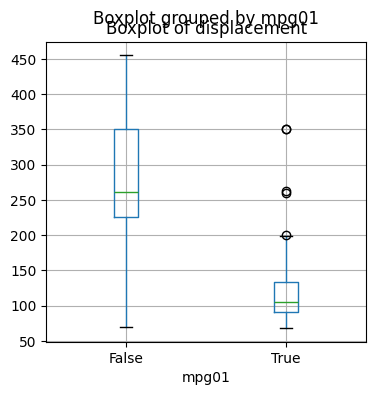

<Figure size 640x480 with 0 Axes>

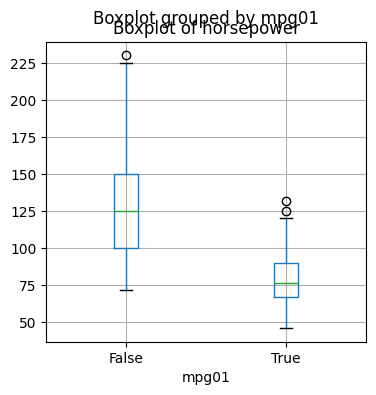

<Figure size 640x480 with 0 Axes>

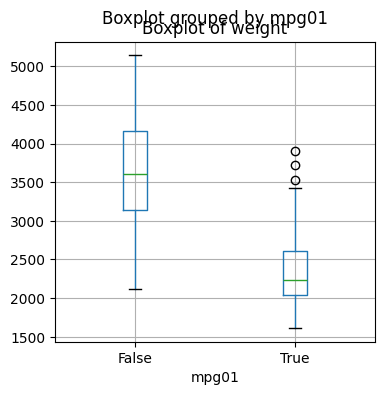

<Figure size 640x480 with 0 Axes>

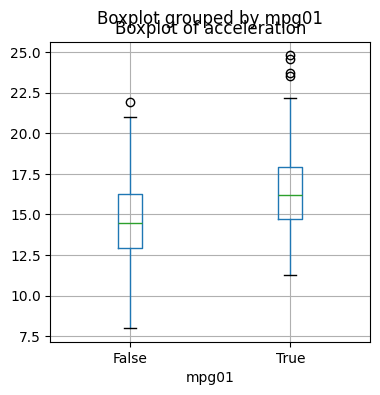

<Figure size 640x480 with 0 Axes>

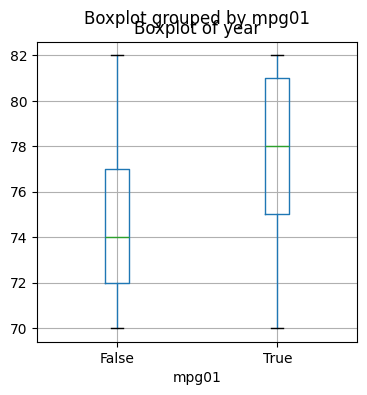

<Figure size 640x480 with 0 Axes>

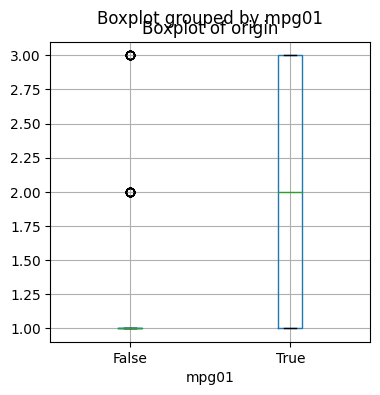

<Figure size 640x480 with 0 Axes>

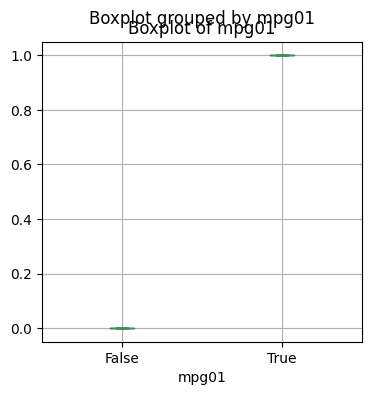

In [118]:
for column in auto.columns:
    plt.figure()  # Create a new figure for each plot
    auto.boxplot(column=column,by='mpg01',figsize=(4,4))
    plt.title(f'Boxplot of {column}')
    plt.show()

- Displacement, horsepower, weight, cylinders seems to differentiate mpg well, also year and acceleration can be used.

(c) Split the data into a training set and a test set

In [136]:
auto = auto.drop(columns='mpg')
auto.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin', 'mpg01'],
      dtype='object')

In [138]:
from sklearn.model_selection import train_test_split
auto_X = auto.drop(columns=['mpg01','origin'])
auto_X_train,auto_X_test, auto_y_train, auto_y_test = train_test_split(auto_X, auto.mpg01,test_size=0.25)


(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

-7.1%

In [140]:
auto_lda = LDA(store_covariance=True)
auto_lda.fit(auto_X_train,auto_y_train)
auto_lda_preds = auto_lda.predict(auto_X_test)

np.mean(auto_lda_preds == auto_y_test), np.mean(auto_lda_preds!=auto_y_test)

(0.9285714285714286, 0.07142857142857142)

In [141]:
confusion_table(auto_lda_preds,auto_y_test)

Truth,False,True
Predicted,,
False,40,2
True,5,51


(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

-8.1 %

In [142]:
auto_qda = QDA()
auto_qda.fit(auto_X_train,auto_y_train)
auto_qda_preds = auto_qda.predict(auto_X_test)
np.mean(auto_qda_preds==auto_y_test) , np.mean(auto_qda_preds!=auto_y_test)

(0.9183673469387755, 0.08163265306122448)

(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

-5.1%

In [149]:
auto_logreg = LogisticRegression(solver='liblinear')
auto_logreg.fit(auto_X_train,auto_y_train);
auto_logreg_preds = auto_logreg.predict(auto_X_test)
np.mean(auto_logreg_preds==auto_y_test) , np.mean(auto_logreg_preds!=auto_y_test)

(0.9489795918367347, 0.05102040816326531)

(g) Perform naive Bayes on the training data in order to predict
mpg01 using the variables that seemed most associated with mpg01
in (b). What is the test error of the model obtained?

- 7.1%

In [150]:
auto_nb = GaussianNB()
auto_nb.fit(auto_X_train,auto_y_train)
auto_nb_preds = auto_nb.predict(auto_X_test)
np.mean(auto_nb_preds==auto_y_test) , np.mean(auto_nb_preds!=auto_y_test)

(0.9285714285714286, 0.07142857142857142)

(h) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

- K=3 has lowest test error rate of 6.1%

In [155]:
for i in range(1,10):
    auto_knn = KNeighborsClassifier(n_neighbors=i)
    auto_knn.fit(auto_X_train,auto_y_train)
    auto_knn_preds = auto_knn.predict(auto_X_test)
    print('For k=',i, np.mean(auto_knn_preds==auto_y_test),np.mean(auto_knn_preds!=auto_y_test))


For k= 1 0.9285714285714286 0.07142857142857142
For k= 2 0.8979591836734694 0.10204081632653061
For k= 3 0.9387755102040817 0.061224489795918366
For k= 4 0.9183673469387755 0.08163265306122448
For k= 5 0.9081632653061225 0.09183673469387756
For k= 6 0.9183673469387755 0.08163265306122448
For k= 7 0.9081632653061225 0.09183673469387756
For k= 8 0.8979591836734694 0.10204081632653061
For k= 9 0.8979591836734694 0.10204081632653061


15. This problem involves writing functions.
(a) Write a function, Power(), that prints out the result of raising 2
to the 3rd power. In other words, your function should compute
23 and print out the results.

Hint: Recall that x**a raises x to the power a. Use the print()
function to display the result

In [156]:
def Power():
    print(2**3)
Power()

8


(b) Create a new function, Power2(), that allows you to pass any
two numbers, x and a, and prints out the value of x**a. You can
do this by beginning your function with the line
def Power2(x, a):
You should be able to call your function by entering, for instance,
Power2(3, 8)
on the command line. This should output the value of 38, namely,
6, 561.

In [157]:
def Power2(x,a):
    print(x**a)
Power2(3,8)

6561


(c) Using the Power2() function that you just wrote, compute 10^3,
8^17, and 131^3

In [158]:
Power2(10,3)
Power2(8,17)
Power2(131,3)

1000
2251799813685248
2248091


(d) Now create a new function, Power3(), that actually returns the
result x**a as a Python object, rather than simply printing it
to the screen. That is, if you store the value x**a in an object
called result within your function, then you can simply return
return
this result, using the following line:
return result
Note that the line above should be the last line in your function,
and it should be indented 4 spaces.


In [160]:
def Power3(x,a):
    result = x**a
    return result

(e) Now using the Power3() function, create a plot of f(x) = x2.
The x-axis should display a range of integers from 1 to 10, and
the y-axis should display x2. Label the axes appropriately, and
use an appropriate title for the figure. Consider displaying either
the x-axis, the y-axis, or both on the log-scale. You can do this
by using the ax.set_xscale() and ax.set_yscale() methods of
the axes you are plotting to

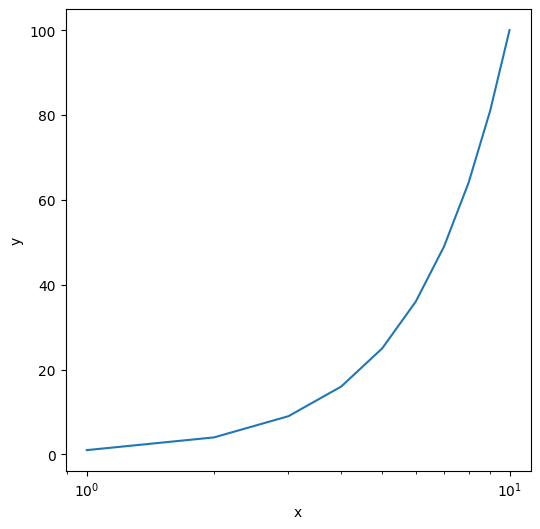

In [175]:
ax = subplots(figsize=(6,6))[1]
l = np.arange(1,11)
l_sq = Power3(l,2)
ax.plot(l,l_sq)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xscale('log')


(f) Create a function, PlotPower(), that allows you to create a plot
of x against x**a for a fixed a and a sequence of values of x. For
instance, if you call
PlotPower(np.arange(1, 11), 3)
then a plot should be created with an x-axis taking on values
1, 2, . . . , 10, and a y-axis taking on values 13, 23, . . . , 103.

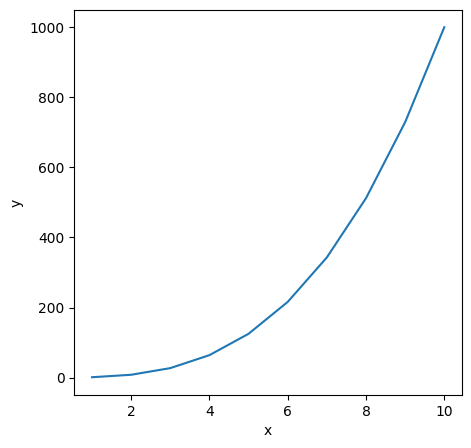

In [176]:
def PlotPower(x,a):
    ax = subplots(figsize=(5,5))[1]
    ydata = Power3(x,a)
    ax.plot(x,ydata)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
PlotPower(np.arange(1, 11), 3)



16. Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, naive Bayes, and KNN models using
various subsets of the predictors. Describe your findings.

Hint: You will have to create the response variable yourself, using the
variables that are contained in the Boston data set

In [186]:
boston = load_data('Boston')
boston.columns
crim01 = np.array([0]*boston.shape[0])
crim01[boston.crim > boston.crim.median()] = 1
boston['crim01'] = crim01
boston = boston.drop('crim',axis=1)

In [190]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True,with_std=True,copy=True)
boston_y = boston['crim01']
boston_X = boston.drop('crim01',axis=1)
boston_X_std = scaler.fit_transform(boston_X)

In [191]:
boston_X_train, boston_X_test, boston_y_train,boston_y_test = train_test_split(boston_X_std,boston_y,test_size=0.25,random_state=0)

In [194]:
boston_lda = LDA()
boston_lda.fit(boston_X_train,boston_y_train)
boston_lda_preds = boston_lda.predict(boston_X_test)
confusion_table(boston_lda_preds,boston_y_test)

Truth,0,1
Predicted,,
0,61,11
1,5,50


In [195]:
np.mean(boston_lda_preds==boston_y_test),np.mean(boston_lda_preds!=boston_y_test)

(0.8740157480314961, 0.12598425196850394)

In [196]:
boston_logreg = LogisticRegression(solver='liblinear')
boston_logreg.fit(boston_X_train,boston_y_train)
boston_logreg_preds = boston_logreg.predict(boston_X_test)
confusion_table(boston_logreg_preds,boston_y_test)

Truth,0,1
Predicted,,
0,59,9
1,7,52


In [197]:
np.mean(boston_logreg_preds==boston_y_test),np.mean(boston_logreg_preds!=boston_y_test)

(0.8740157480314961, 0.12598425196850394)

In [198]:
boston_nb = GaussianNB()
boston_nb.fit(boston_X_train,boston_y_train)
boston_nb_preds = boston_nb.predict(boston_X_test)
confusion_table(boston_nb_preds,boston_y_test)

Truth,0,1
Predicted,,
0,55,11
1,11,50


In [199]:
np.mean(boston_nb_preds==boston_y_test),np.mean(boston_nb_preds!=boston_y_test)

(0.8267716535433071, 0.1732283464566929)

In [201]:
for k in range(1,11):
    boston_knn = KNeighborsClassifier(n_neighbors=k)
    boston_knn.fit(boston_X_train,boston_y_train)
    boston_knn_preds = boston_knn.predict(boston_X_test)
    print('For k=',k,(np.mean(boston_knn_preds==boston_y_test),np.mean(boston_knn_preds!=boston_y_test)))

For k= 1 (0.937007874015748, 0.06299212598425197)
For k= 2 (0.9212598425196851, 0.07874015748031496)
For k= 3 (0.8976377952755905, 0.10236220472440945)
For k= 4 (0.8976377952755905, 0.10236220472440945)
For k= 5 (0.889763779527559, 0.11023622047244094)
For k= 6 (0.8818897637795275, 0.11811023622047244)
For k= 7 (0.8740157480314961, 0.12598425196850394)
For k= 8 (0.8818897637795275, 0.11811023622047244)
For k= 9 (0.8740157480314961, 0.12598425196850394)
For k= 10 (0.8740157480314961, 0.12598425196850394)


In [202]:
boston_knn = KNeighborsClassifier(n_neighbors=1)
boston_knn.fit(boston_X_train,boston_y_train)
boston_knn_preds = boston_knn.predict(boston_X_test)
confusion_table(boston_knn_preds,boston_y_test)

Truth,0,1
Predicted,,
0,63,5
1,3,56


In [203]:
boston_qda = QDA()
boston_qda.fit(boston_X_train,boston_y_train)
boston_qda_preds = boston_qda.predict(boston_X_test)
confusion_table(boston_qda_preds,boston_y_test)


Truth,0,1
Predicted,,
0,62,9
1,4,52


In [204]:
np.mean(boston_qda_preds==boston_y_test), np.mean(boston_qda_preds!=boston_y_test)

(0.8976377952755905, 0.10236220472440945)

- Worst model in this case is naive bayes, and best performer is KNN with k = 1. Test error rate of LDA, naive bayes, logistic regression, KNN=1, and QDA are 12.6%, 17.3%,12.6%, 6.3%, and 10.2% respectively. Also note that because quantitative features have very different ranges they are normalized with mean 0 and std 1 by using standartScaler().